## Question

The Objective of this assignment is to introduce students to rule mining techniques, particularly focusing on market basket analysis and provide hands on experience.

Dataset:

Use the Online retail dataset to apply the association rules.

Data Preprocessing:

Pre-process the dataset to ensure it is suitable for Association rules, this may include handling missing values, removing duplicates, and converting the data to appropriate format.  

Association Rule Mining:

•	Implement an Apriori algorithm using tool like python with libraries such as Pandas and Mlxtend etc.

•	 Apply association rule mining techniques to the pre-processed dataset to discover interesting relationships between products purchased together.

•	Set appropriate threshold for support, confidence and lift to extract meaning full rules.
Analysis and Interpretation:

•	Analyse the generated rules to identify interesting patterns and relationships between the products.

•	Interpret the results and provide insights into customer purchasing behaviour based on the discovered rules.

Interview Questions:

1.	What is lift and why is it important in Association rules?
2.	What is support and Confidence. How do you calculate them?
3.	What are some limitations or challenges of Association rules mining?


## Answer

In [1]:
!pip install mlxtend

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from mlxtend.frequent_patterns import apriori,association_rules

In [22]:
# Reading the .xlsx file
df = pd.read_excel("Online retail.xlsx", header = None)
dg = df[0].str.split(',', expand=True)


In [23]:
print(dg)

                 0                  1            2                 3   \
0            shrimp            almonds      avocado    vegetables mix   
1           burgers          meatballs         eggs              None   
2           chutney               None         None              None   
3            turkey            avocado         None              None   
4     mineral water               milk   energy bar  whole wheat rice   
...             ...                ...          ...               ...   
7496         butter         light mayo  fresh bread              None   
7497        burgers  frozen vegetables         eggs      french fries   
7498        chicken               None         None              None   
7499       escalope          green tea         None              None   
7500           eggs    frozen smoothie  yogurt cake    low fat yogurt   

                4                 5     6               7             8   \
0     green grapes  whole weat flour  yams  cot

In [24]:
grocery_items = set()
for col in dg.columns:
    grocery_items.update(dg[col].unique())

output_list = list()
for _, row in dg.iterrows():
    row_val = {item: 0 for item in grocery_items}
    row_val.update({item: 1 for item in row if pd.notna(item)})
    output_list.append(row_val)

grocery = pd.DataFrame(output_list)

grocery.head()

,tomato juice,gluten free bar,babies food,grated cheese,mint,zucchini,yams,shallot,green tea,shrimp,...,cooking oil,body spray,pepper,mayonnaise,eggs,corn,ground beef,whole wheat rice,salad,bacon
0,1,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
grocery.columns.tolist()

['tomato juice',
 'gluten free bar',
 'babies food',
 'grated cheese',
 'mint',
 'zucchini',
 'yams',
 'shallot',
 'green tea',
 'shrimp',
 'strawberries',
 'escalope',
 'avocado',
 'fresh tuna',
 'antioxydant juice',
 'melons',
 'brownies',
 'fresh bread',
 'frozen vegetables',
 'gums',
 'whole weat flour',
 'mineral water',
 'honey',
 'light mayo',
 'turkey',
 'cottage cheese',
 'meatballs',
 'chocolate',
 'rice',
 'white wine',
 'blueberries',
 'spaghetti',
 'cake',
 'sparkling water',
 'muffins',
 'dessert wine',
 'ketchup',
 'nonfat milk',
 'soda',
 'green beans',
 'protein bar',
 'french wine',
 'olive oil',
 'almonds',
 'chicken',
 'carrots',
 'magazines',
 'frozen smoothie',
 'pasta',
 'tomatoes',
 'cereals',
 'fromage blanc',
 'champagne',
 'energy drink',
 'french fries',
 'bramble',
 'black tea',
 'cookies',
 'whole wheat pasta',
 ' asparagus',
 'pancakes',
 'yogurt cake',
 'burger sauce',
 'mint green tea',
 'herb & pepper',
 'burgers',
 'candy bars',
 'light cream',
 'cide

In [26]:
# View top sold items

total_item_count = sum(grocery.sum())
print("Total Item : ", total_item_count)
print()
item_summary = grocery.sum().sort_values(ascending = False).reset_index()
item_summary.rename(columns={item_summary.columns[0]:'item_name',item_summary.columns[1]:'item_count'}, inplace=True)
print("Item Summary:")
print(item_summary.head())

Total Item :  29358

Item Summary:
       item_name  item_count
0  mineral water        1788
1           eggs        1348
2      spaghetti        1306
3   french fries        1282
4      chocolate        1229


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1841: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


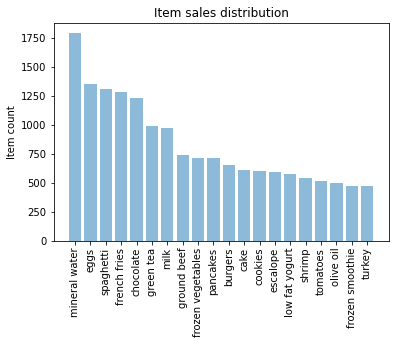

In [27]:
# Visualize top sold items

objects = (list(item_summary['item_name'].head(n=20)))
y_pos = np.arange(len(objects))
performance = list(item_summary['item_count'].head(n=20))

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Item count')
plt.title('Item sales distribution')
plt.show()

In [28]:
# Generating frequent item sets

frequent_itemsets = apriori(grocery, min_support=0.047, use_colnames=True)

C:\ProgramData\Anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [29]:
# Generating rules

my_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [30]:
#viewing top 100 rules

my_rules.head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197
1,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965
2,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606
3,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437
4,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650,0.409465
5,(mineral water),(milk),0.238368,0.129583,0.047994,0.201342,1.553774,0.017105,1.089850,0.467950
6,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,0.193648
7,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,0.208562


## What is lift and why is it important in Association rules?



Lift: Lift is a measure used in association rule mining to quantify how much more often the antecedent and consequent of a rule occur together than we would expect if they were statistically independent. It is calculated as the ratio of the observed support to the expected support if the antecedent and consequent were independent. Lift helps to determine the strength of a rule and indicates the strength of the relationship between items.

## What is support and Confidence. How do you calculate them?



Support: Support is a measure that indicates how frequently an itemset appears in a dataset. It is calculated as the number of transactions containing the itemset divided by the total number of transactions.

Confidence: Confidence is a measure that indicates the likelihood of the consequent appearing in a transaction given that the antecedent is present. It is calculated as the number of transactions containing both the antecedent and the consequent divided by the number of transactions containing the antecedent.

Mathematically:

Support of {A} = (Transactions containing {A}) / (Total transactions)

Confidence of {A -> B} = (Transactions containing both {A and B}) / (Transactions containing {A})

## What are some limitations or challenges of Association rules mining?



Large itemsets: As the number of items increases, the number of possible itemsets grows exponentially, leading to a combinatorial explosion. This makes it computationally expensive to find all frequent itemsets.

Sparse datasets: In datasets where most items occur rarely, finding meaningful associations becomes challenging. Low support values may lead to many false positive associations.

Multiple testing: When mining for associations among many itemsets, there's a higher chance of finding spurious associations due to multiple comparisons.

Interpreting results: While association rules provide insights into co-occurrence patterns, interpreting the rules and understanding their implications in a real-world context can be complex.

Data quality: Association rules are sensitive to noise and outliers in the data, which can lead to misleading or incorrect associations.

Scalability: For large datasets, the computational complexity of finding frequent itemsets and generating rules can be prohibitive.

Context and domain knowledge: Association rules do not capture causality or temporal relationships. Understanding the context and domain knowledge is crucial for interpreting and applying the rules correctly.